In [185]:
import kagglehub
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

Data Details:

- Gender: Gender 
- Age: Age 
- Height : in metres 
- Weight : in kgs 
- family_history : Has a family member suffered or suffers from overweight? 
- FAVC : Do you eat high caloric food frequently? 
- FCVC : Do you usually eat vegetables in your meals? 
- NCP : How many main meals do you have daily? 
- CAEC : Do you eat any food between meals? 
- SMOKE : Do you smoke? 
- CH2O : How much water do you drink daily? 
- SCC : Do you monitor the calories you eat daily? 
- FAF: How often do you have physical activity? 
- TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others? 
- CALC : How often do you drink alcohol? 
- MTRANS : Which transportation do you usually use? 
- Obesity_level (Target Column) : Obesity level

In [154]:
pd.set_option('display.max_columns', None)

In [155]:
path = kagglehub.dataset_download("ankushpanday1/alzheimers-prediction-dataset-global")
file = pd.read_csv(os.path.join(path, 'alzheimers_prediction_dataset.csv'))

In [156]:
file

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,Normal,No,90,Low,Poor,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,Normal,No,65,Low,Good,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,Normal,No,43,High,Good,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,Normal,No,81,Medium,Average,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,Normal,No,49,High,Poor,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,High,No,42,Medium,Poor,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,Normal,No,42,Low,Poor,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,High,Yes,61,Low,Good,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,High,No,97,High,Good,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


In [157]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [158]:
file.isna().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [159]:
file_copy = file.copy()

In [160]:
file = file.drop(columns='Country')

In [161]:
# Ordinal Labels
ordinal_labels = {
    'Physical Activity Level': ['Low', 'Medium', 'High'],
    'Alcohol Consumption': ['Never', 'Occasionally', 'Regularly'],
    'Cholesterol Level': ['Normal', 'High'],
    'Depression Level': ['Low', 'Medium', 'High'],
    'Sleep Quality': ['Poor', 'Average', 'Good'],
    'Dietary Habits': ['Unhealthy', 'Average', 'Healthy'],
    'Air Pollution Exposure': ['Low', 'Medium', 'High'],
    'Social Engagement Level': ['Low', 'Medium', 'High'],
    'Income Level': ['Low', 'Medium', 'High'],
    'Stress Levels': ['Low', 'Medium', 'High']
}
ordinal_columns = list(ordinal_labels.keys())
ordinal_encoder = OrdinalEncoder(categories=[ordinal_labels[col] for col in ordinal_columns])


In [162]:
# OneHot Encoder
bins = [0, 18.5, 24.9, 29.9, 34.99, 39.99, float('inf')]
labels = ['Abaixo do peso', 'Peso normal', 'Sobrepeso', 'Obesidade Grau I', 'Obesidade Grau II', 'Obesidade Grau III']
file['BMI'] = pd.cut(file['BMI'], bins = bins, labels=labels)
onehot_columns = ['Gender', 'BMI', 'Smoking Status', 'Diabetes', 'Hypertension', "Family History of Alzheimer’s", 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Urban vs Rural Living']
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)


In [163]:
# StandarScaler
scaler_columns = ['Age', 'Education Level', 'Cognitive Test Score']
scaler = StandardScaler()

In [164]:
pipeline_preprocessing = ColumnTransformer([
    ('ordinal_preprocessing', ordinal_encoder, ordinal_columns),
    ('onehot_preprocessing', onehot_encoder, onehot_columns),
    ('numeric_preprocessing', scaler, scaler_columns)
])

In [165]:
file['Alzheimer’s Diagnosis'].value_counts()

Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64

In [166]:
# Checagem do balanceamento de classe
count_minor_cat = len(file[file['Alzheimer’s Diagnosis'] == 'Yes'])

In [167]:
minor_cat = file[file['Alzheimer’s Diagnosis'] == 'Yes']
maior_cat = file[file['Alzheimer’s Diagnosis'] == 'No'][:count_minor_cat]
file = pd.concat([minor_cat, maior_cat], axis=0)

In [168]:
file['Alzheimer’s Diagnosis'].value_counts()

Alzheimer’s Diagnosis
Yes    30713
No     30713
Name: count, dtype: int64

In [172]:
features = file.drop(columns='Alzheimer’s Diagnosis')
dict_ = {
    'Yes':1,
    'No':0
}
target = file['Alzheimer’s Diagnosis'].map(dict_)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [128]:
modelos = {
    'LogisticRegression': LogisticRegression(),
    'SVC':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier()
}

In [134]:
results = []
for name, model in modelos.items():
    pipeline_model = Pipeline([
        ('preprocessing', pipeline_preprocessing),
        ('logistic_model', model)
    ])
    pipeline_model.fit(X_train, y_train)
    y_pred = pipeline_model.predict(X_test)
    print(f'{name}:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Classification: {classification_report(y_test, y_pred)}')

LogisticRegression:
Accuracy: 0.7157586281745171
Classification:               precision    recall  f1-score   support

          No       0.72      0.71      0.71      9245
         Yes       0.71      0.72      0.72      9183

    accuracy                           0.72     18428
   macro avg       0.72      0.72      0.72     18428
weighted avg       0.72      0.72      0.72     18428

SVC:
Accuracy: 0.7210223572823964
Classification:               precision    recall  f1-score   support

          No       0.75      0.67      0.71      9245
         Yes       0.70      0.78      0.74      9183

    accuracy                           0.72     18428
   macro avg       0.72      0.72      0.72     18428
weighted avg       0.72      0.72      0.72     18428

DecisionTreeClassifier:
Accuracy: 0.6196548730193184
Classification:               precision    recall  f1-score   support

          No       0.62      0.63      0.62      9245
         Yes       0.62      0.61      0.62      9183

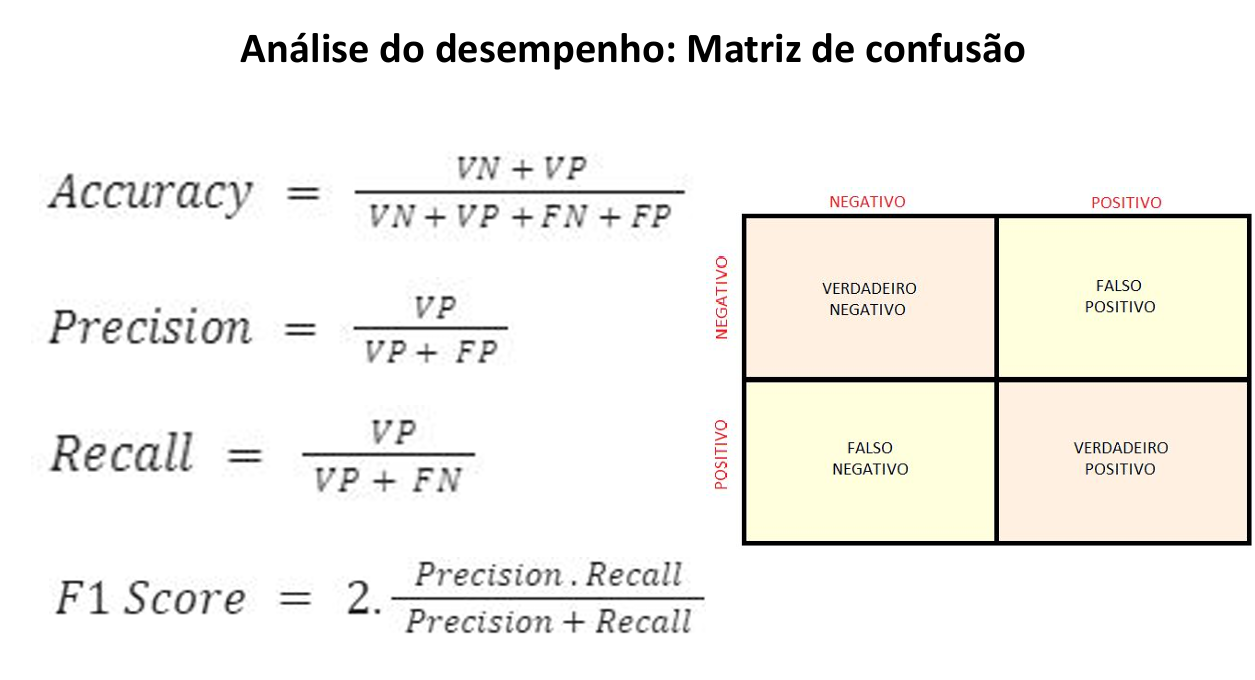

In [ ]:
# Precision --> Preciso ao maximo diminuir a quantidade de falso positivos
# Recall    --> Preciso ao maximo diminuir a quantidade de falso negativo

In [136]:
model = LogisticRegression()

In [139]:
y_scores = cross_val_predict(pipeline_model_v1, X_train, y_train, cv=3, method="decision_function")

array(['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'No'],
      shape=(42998,), dtype=object)

In [182]:
previsoes

array([1, 1, 1, ..., 1, 1, 1], shape=(18428,))

In [190]:
from sklearn.metrics import precision_score, recall_score, f1_score
pipeline = Pipeline([
    ('preprocessing', pipeline_preprocessing),
    ('model', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)

# Probabilidades
probabilidades = pipeline.predict_proba(X_test)

# Ajuste do limiar
limiares = np.arange(0.1, 1.01, 0.1)
for limiar in limiares:
    previsoes = np.where(probabilidades[:, 1] >= limiar, 1, 0)
    precisao = precision_score(y_test, previsoes)
    recall = recall_score(y_test, previsoes)
    f1 = f1_score(y_test, previsoes)
    a = accuracy_score(y_test, previsoes)
    print(f"Limiar: {limiar:.1f}, Precisão: {precisao:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, Accuracy: {a:.2f}")

Limiar: 0.1, Precisão: 0.51, Recall: 1.00, F1-score: 0.67, Accuracy: 0.51
Limiar: 0.2, Precisão: 0.56, Recall: 0.98, F1-score: 0.72, Accuracy: 0.61
Limiar: 0.3, Precisão: 0.61, Recall: 0.93, F1-score: 0.74, Accuracy: 0.67
Limiar: 0.4, Precisão: 0.66, Recall: 0.84, F1-score: 0.74, Accuracy: 0.71
Limiar: 0.5, Precisão: 0.71, Recall: 0.76, F1-score: 0.73, Accuracy: 0.73
Limiar: 0.6, Precisão: 0.74, Recall: 0.61, F1-score: 0.67, Accuracy: 0.70
Limiar: 0.7, Precisão: 0.81, Recall: 0.34, F1-score: 0.48, Accuracy: 0.63
Limiar: 0.8, Precisão: 0.87, Recall: 0.15, F1-score: 0.26, Accuracy: 0.57
Limiar: 0.9, Precisão: 0.94, Recall: 0.02, F1-score: 0.04, Accuracy: 0.51
Limiar: 1.0, Precisão: 0.00, Recall: 0.00, F1-score: 0.00, Accuracy: 0.50


c:\Users\celso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [176]:
limiar

np.float64(0.9)

In [178]:
probabilidades[:, 1]

array([0.77, 0.59, 0.16, ..., 0.64, 0.25, 0.58], shape=(18428,))

In [177]:
np.where(probabilidades[:, 1] >= 0.5, 1, 0)

array([1, 1, 0, ..., 1, 0, 1], shape=(18428,))